In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X and Y where X will be all the axis excpet the output column and Y will only contain the output column
X = heart_disease.drop("target", axis = 1)

Y = heart_disease["target"]
X.shape, Y.shape

((303, 13), (303,))

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [7]:
# Make prediction
Y_preds = clf.predict(X_test)
Y_preds

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
# Find the score in the training data from which it is trained itself which should give 100% that is 1.0.
clf.score(X_train, Y_train)

1.0

In [9]:
clf.score(X_test, Y_test)

0.8852459016393442

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [11]:
 confusion_matrix(Y_test, Y_preds)

array([[23,  4],
       [ 3, 31]], dtype=int64)

In [12]:
accuracy_score(Y_test, Y_preds)

0.8852459016393442

In [13]:
# To improve a model we can try it with different n_estimators which is a parameter of RandomForestClassifier technique.

np.random.seed(1)
for i in range(10, 100, 10):
    print("Model with parameters = "+ str(i))
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print("Model accuracy on test set = " + str(clf.score(X_test, Y_test)*100) + "%")
    print("")

Model with parameters = 10
Model accuracy on test set = 75.40983606557377%

Model with parameters = 20
Model accuracy on test set = 85.24590163934425%

Model with parameters = 30
Model accuracy on test set = 88.52459016393442%

Model with parameters = 40
Model accuracy on test set = 86.88524590163934%

Model with parameters = 50
Model accuracy on test set = 83.60655737704919%

Model with parameters = 60
Model accuracy on test set = 85.24590163934425%

Model with parameters = 70
Model accuracy on test set = 88.52459016393442%

Model with parameters = 80
Model accuracy on test set = 85.24590163934425%

Model with parameters = 90
Model accuracy on test set = 88.52459016393442%



In [14]:
import pickle

pickle.dump(clf, open("random_forest_model_1", "wb"))

In [15]:
# Load a saved model

loaded_model = pickle.load(open("random_forest_model_1", "rb"))
loaded_model.score(X_test, Y_test)

0.8852459016393442

In [16]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
executable: D:\ML_Projects\sample_project\env\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
          pip: 20.2.4
   setuptools: 50.3.0.post20201006
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.5.0
       Cython: None
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 0.17.0
threadpoolctl: 2.1.0

Built with OpenMP: True


In [17]:
# It is not always good to have more data, sometimes reduced data can give same results which is more cost effective.
# So now focus on filling missing data and cleaning data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [18]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [19]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [20]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [21]:
# First Convert data to numbers so that our model can train it and test it.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                 categorical_columns)],
                                 remainder="passthrough")

transformed_X = transformer.fit(X)
transformed_X

ValueError: Input contains NaN

In [22]:
# Fill the missing values
car_sales_missing["Make"].fillna("missing", inplace = True)
car_sales_missing["Colour"].fillna("missing", inplace = True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)
car_sales_missing["Doors"].fillna(4, inplace = True)

In [23]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [24]:
# We are predicting the Price so we remove the rows with missing values of Price
car_sales_missing.dropna(inplace = True)

In [25]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [26]:
len(car_sales_missing)

950

In [27]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                 categorical_columns)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [29]:
pd.DataFrame(transformed_X).head()

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."


In [30]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

In [31]:
model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_test, y_test)

0.22011714008302485

## To choose the right estimator/machine learning model use SCIKIT learn MACHINE_LEARNING MAP in their website

In [32]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [33]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

In [34]:
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
from sklearn.linear_model import Ridge

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)
model = Ridge().fit(X_train, y_train)
model.score(X_test, y_test)

0.6662221670168522

## How to improve the above score, if ridge is not working

In [36]:
# Check the scikit learn model map
# Try Random Forest

from sklearn.ensemble import RandomForestRegressor

np.random.seed(1000) # Changing the random seed increases/decreases the accuracy

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)
rf = RandomForestRegressor().fit(X_train, y_train)
rf.score(X_test, y_test)


0.9083730196948632

In [37]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## This above heart disease is a classification problem and in Boston we predicted quantity and hence Regression problem.

In [38]:
len(heart_disease)

303

In [39]:
## By seeing in model map we see first to try in LINEAR SVC

from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

D:\ML_Projects\sample_project\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [40]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(100)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8852459016393442

In [41]:
rf.predict(np.array([1,5,6,7,3,8,8,8])) # this does not work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 5. 6. 7. 3. 8. 8. 8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [42]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [43]:
y_preds = rf.predict(X_test) # Predictions
y_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [44]:
np.array(y_test) # Real output

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [45]:
np.mean(y_preds == y_test)

0.8852459016393442

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8852459016393442

In [47]:
rf.predict_proba(X_test[:5])

array([[0.17, 0.83],
       [0.91, 0.09],
       [0.92, 0.08],
       [0.02, 0.98],
       [0.39, 0.61]])

* The greater number of both gives the probablity of getting correct target

# Evaluate a machine learning model 

In [48]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(100)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);

In [49]:
rfc.score(X_test, y_test)

0.8852459016393442

In [50]:
cross_val_score(rfc, X, y)

array([0.81967213, 0.8852459 , 0.83606557, 0.81666667, 0.76666667])

### Here the Cross_val_score splits the data into 5 folds and evaluated the model for all splits and return the accuracy.

In [51]:
# So take them mean to get correct accuracy

rfc_cross_val_score = np.mean(cross_val_score(rfc, X, y))
rfc_cross_val_score, rfc.score(X_test, y_test)

(0.8215300546448088, 0.8852459016393442)

In [52]:
print(f"Accuracy = {rfc_cross_val_score*100:.2f}%")

Accuracy = 82.15%


## ROC/AUC(Area under curve/Receiver Operating Curve/Rock Curve)

In [53]:
# ROC curves are comparision of models true positive rate (tpr) vs false positive rate(fpr)

from sklearn.metrics import roc_curve

y_probs = rfc.predict_proba(X_test)
y_probs[:10]

array([[0.17, 0.83],
       [0.91, 0.09],
       [0.92, 0.08],
       [0.02, 0.98],
       [0.39, 0.61],
       [0.78, 0.22],
       [0.72, 0.28],
       [0.69, 0.31],
       [0.19, 0.81],
       [0.28, 0.72]])

In [54]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.83, 0.09, 0.08, 0.98, 0.61, 0.22, 0.28, 0.31, 0.81, 0.72])

In [55]:
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)
fpr, threshold

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.12121212, 0.12121212, 0.15151515, 0.15151515,
        0.24242424, 0.3030303 , 0.33333333, 0.42424242, 0.42424242,
        0.48484848, 0.54545455, 0.63636364, 0.75757576, 0.81818182,
        0.87878788, 0.90909091, 0.96969697, 1.        ]),
 array([1.99, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.87, 0.84, 0.81, 0.8 ,
        0.66, 0.61, 0.6 , 0.57, 0.44, 0.37, 0.31, 0.29, 0.28, 0.22, 0.2 ,
        0.09, 0.08, 0.06, 0.05, 0.04, 0.03, 0.02]))

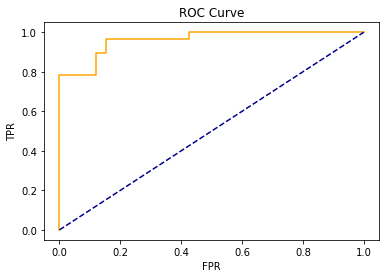

In [56]:
# Plot the fpr or tpr

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color ="orange", label = "ROC")
    
    plt.plot([0,1], [0,1], color ="darkblue", linestyle = "--", label = "Guessing")
    
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.show()

plot_roc_curve(fpr, tpr)

In [57]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.961038961038961

### Confusion Matrix 

In [58]:
from sklearn.metrics import confusion_matrix

y_preds = rfc.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[27,  6],
       [ 1, 27]], dtype=int64)

In [59]:
# Visualize the above matrix

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,27,6
1,1,27


* 6 - False Positive
* 1 - False Negative

# Install package directly in Jupyter

In [114]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: D:\ML_Projects\sample_project\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.0             |             py_0         210 KB
    ------------------------------------------------------------
                                           Total:         210 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.0-py_0




seaborn-0.11.0       | 210 KB    |            |   0% 
seaborn-0.11.0       | 210 KB    | 7          |   8% 
seaborn-0.11.0       | 210 KB    | ######     |  61% 
seaborn-0.11.0       | 210 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


<AxesSubplot:>

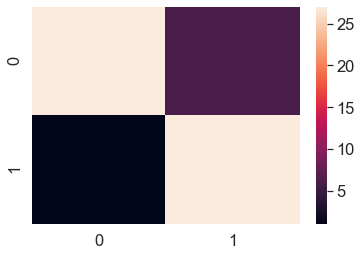

In [60]:
import seaborn as sns

sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test,
                           y_preds)
sns.heatmap(conf_mat)

Text(-1.5, 0.5, 'Predicted Label')

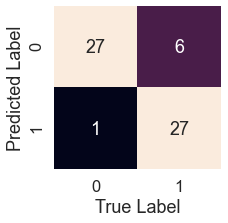

In [61]:
fig, ax = plt.subplots(figsize = (3,3))
ax = sns.heatmap(conf_mat,
                annot = True,
                cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))
pd.DataFrame(classification_report(y_test, 
                                   y_preds,
                                  output_dict=True))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



,0,1,accuracy,macro avg,weighted avg
precision,0.964286,0.818182,0.885246,0.891234,0.897222
recall,0.818182,0.964286,0.885246,0.891234,0.885246
f1-score,0.885246,0.885246,0.885246,0.885246,0.885246
support,33.000000,28.000000,0.885246,61.000000,61.000000


## Regression model evaluation metrics

In [63]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [64]:
model.score(X_test, y_test)

0.8654448653350507

In [65]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [67]:
r2_score(y_test, y_test_mean)  # If your model only predicts the mean value of the target then R^2 value = 0

0.0

In [68]:
r2_score(y_test, y_test)

1.0

### MAS

In [70]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [74]:
df = pd.DataFrame(data = {
    "actual_values": y_test,
    "predicted_values" : y_preds
})
df["differences"] = df["predicted_values"] - df["actual_values"]
df

,actual_values,predicted_values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [76]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [78]:
cv_acc.mean()*100

82.48087431693989

In [80]:
cv_precision = cross_val_score(clf, X, y, scoring = "precision")
cv_precision.mean()

0.8209201193072161

In [81]:
cv_recall = cross_val_score(clf, X, y, scoring = "recall")
cv_recall.mean()

0.8484848484848484

In [82]:
cv_f1 = cross_val_score(clf, X, y, scoring = "f1")
cv_f1.mean()

0.8455032904593217

In [83]:
# For f1 score, accuracy, recall, precision we can also use the in-built functions scikit learn.

# Improving a model

In [95]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

def evaluate_preds(y_true, y_preds):
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy" : round(accuracy,2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    return metric_dict

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffles the data that's it
heart_shuffled = heart_disease.sample(frac = 1)

X = heart_shuffled.drop("target", axis = 1)
y = heart_shuffled["target"]

train_split = round(0.7 * len(heart_shuffled))
valid_split = round(train_split + 0.15 * len(heart_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split: valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier().fit(X_train, y_train)

y_preds = clf.predict(X_valid)
baseline_metric = evaluate_preds(y_valid, y_preds)
baseline_metric

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [101]:
np.random.seed(42)
clf2 = RandomForestClassifier(max_depth = 10).fit(X_train, y_train)

y_preds2 = clf2.predict(X_valid)
baseline_metric1 = evaluate_preds(y_valid, y_preds2)
baseline_metric1

{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

### Hyperparameter tuning with RandomizedSearchCV

In [104]:
from sklearn.model_selection import RandomizedSearchCV
grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2,4,6],
    "min_samples_leaf": [1, 2, 4]
}

np.random.seed(42)

X = heart_shuffled.drop("target", axis = 1)
y = heart_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)
clf = RandomForestClassifier(n_jobs = 1)

rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter = 10,
                           cv = 5,
                           verbose = 2)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   17.7s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [105]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [106]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}